<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Neural Network Model

Die Funktionsweise von neuronalen Netzwerken ist angelehnt an biologische Abläufe im Gehirn. Mehrere Neuronen sind untereinander verbunden und erzeugen abhängig vom Input ein Signal, das sie an die nachstehenden Neuronen weitergeben. 

Innerhalb von neuronalen Netzen stellt das Perceptron eine wiederkehrende Struktur dar. Es hat ein oder mehrere Inputs und einen Bias, welche jeweils mit einem Weight-Faktor multipliziert und anschließend aufsummiert werden. Das Ergebnis wird in eine Activation Function gespeißt, welche einen einzelnen Output-Wert berechnet.

<img src='images/perceptron.png' width="400px" align="center" />

In einem neuralen Netz werden mehre Perceptrons miteinander verknüpft. Der Input Layer nimmt den Datensatz mit den Features entgegen und der Output Layer erzeugt das Ergebnis, in diesem Fall die Klassifizierung "left - yes or no". Die Layer dazwischen werden als Hidden Layer bezeichnet. Größer die Anzahl der Hidden Layer und je größer die Anzahl der Perceptrons pro Layer, desto höher wird der Grad der Komplexität, der mit dem neuronalen Netz abgebildet werden kann.

<img src='images/neural_network.png' width="300px" align="center" />

Da bei den bisher getesteten Modellen Logistic Regression und Support Vector Machine hat noch ein "High Bias" und somit "Underfitting) vorgelegen. Sie waren damit nicht in der Lage die komplexen Zusammenhänge des Datensets ausreichend abzubilden, sodass die Fehlerquote selbst auf den Trainingsdaten hoch war. Bei den neuronalen Netzen besteht die Hoffnung, dass sie bei einer hohen Anzahl an Neuronen und Layern weitere Details erlernen können und sich somit der Bias reduzieren lässt.

### Initializations

In [1]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [4]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Neural Network

Für einen ersten Test wurde eine Netzwerkarchitektur mit fünf Layern gewählt, wobei die Anzahl der Neuronen pro Layer jeweils abnimmt. Mit einem Score von 95,20% wurde bereits ein gutes Ergebnis erreicht. Die Learning Curve zeigt allerdings, dass immer noch ein bias besteht.

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(44,44,22,22,11), max_iter=10000, random_state=42)

In [6]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(44, 44, 22, 22, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [7]:
mlp.score(X_test_scaled, y_test)

0.95199999999999996

In [8]:
predictions = mlp.predict(X_test_scaled)

In [9]:
print(confusion_matrix(y_test, predictions))

[[1502   34]
 [  62  402]]


In [10]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1536
          1       0.92      0.87      0.89       464

avg / total       0.95      0.95      0.95      2000



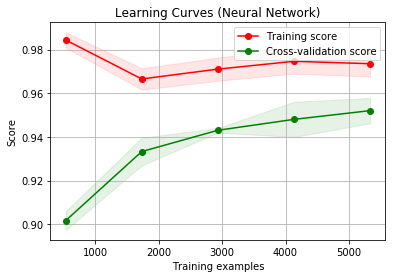

In [11]:
title = 'Learning Curves (Neural Network)'
estimator = mlp
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Use Neural Network w/o Department

Wie bei den vorherigen Modellen wurde als nächstes das Attribut Department aus der Betrachtung heraus gelassen. Damit umfasst das Trainingsset zehn Spalten weniger, sodass bei gleicher Anzahl an Neuronen ein besseres Fitting erwartet wird. Letzendlich wurde der Score auch auf 96,20% verbessert, der bias aber kaum reduziert.

In [12]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(44,44,22,22,11), max_iter=10000, random_state=42)

In [14]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(44, 44, 22, 22, 11), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
mlp.score(X_test_scaled, y_test)

0.96199999999999997

In [16]:
predictions = mlp.predict(X_test_scaled)

In [17]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1512   24]
 [  52  412]]


In [18]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1531,    5],
       [  25,  439]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [19]:
cm_dict.item().update({'neural_net':{'cm': cm, 'label': 'Neural Network' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1512,   24],
       [  52,  412]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1531,    5],
       [  25,  439]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  25,  439]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [20]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98      1536
          1       0.94      0.89      0.92       464

avg / total       0.96      0.96      0.96      2000



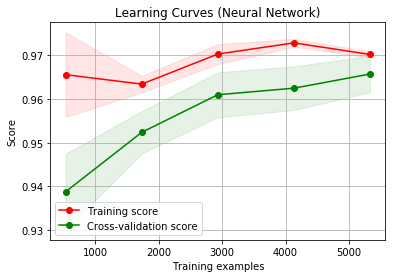

In [21]:
title = 'Learning Curves (Neural Network)'
estimator = mlp
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using Randomized Search

In [22]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV

In [23]:
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [24]:
mlp = MLPClassifier(max_iter=10000, random_state=42)

In [25]:
param_space = {'hidden_layer_sizes': [(100,), (100,100,), (100,100,100,)],'activation':['identity', 'logistic', 'tanh', 'relu'], 'solver':['lbfgs', 'sgd', 'adam'],'learning_rate': ['constant', 'invscaling', 'adaptive'], 'learning_rate_init': stats.uniform(0.001, 0.05), 'alpha':stats.uniform(0.0001, 0.005)}

In [28]:
rs = RandomizedSearchCV(mlp, param_space, n_iter=50, cv=5, n_jobs=8)

In [ ]:
rs.fit(X_train_scaled, y_train)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


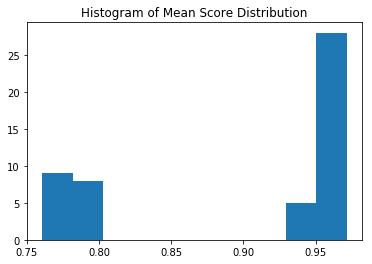

In [11]:
scores = pd.DataFrame(rs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [12]:
rs.best_score_

0.97135118241483487

In [13]:
rs.best_params_

{'activation': 'logistic',
 'alpha': 0.0023345834533400802,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.023689628490366484,
 'solver': 'lbfgs'}

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=10000, random_state=42, activation='logistic', alpha=0.0023345834533400802, learning_rate='constant', learning_rate_init=0.023689628490366484, solver='lbfgs')

In [15]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.00233458345334008,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(100, 100),
       learning_rate='constant', learning_rate_init=0.023689628490366484,
       max_iter=10000, momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
mlp.score(X_test_scaled, y_test)

0.97499999999999998

In [17]:
predictions = mlp.predict(X_test_scaled)

In [18]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1809   38]
 [  22  531]]


In [19]:
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1798,   49],
       [  24,  529]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1825,   22],
       [  61,  492]]), 'label': 'Deep Neural Network'}}


In [20]:
cm_dict.item().update({'neural_net':{'cm': cm, 'label': 'Neural Network' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1736,  111],
       [ 345,  208]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1822,   25],
       [  19,  534]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1818,   29],
       [ 337,  216]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1825,   22],
       [  61,  492]]), 'label': 'Deep Neural Network'}}


In [21]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1847
          1       0.93      0.96      0.95       553

avg / total       0.98      0.97      0.98      2400



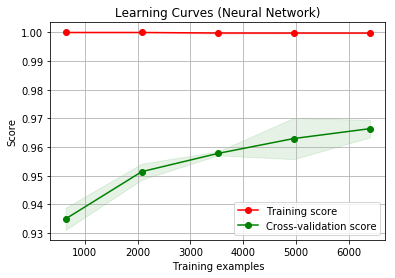

In [22]:
title = 'Learning Curves (Neural Network)'
estimator = mlp
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()